## 사이킷런을 이용하여 데이터 섞기

In [31]:
import random as rd

A_len = []
A_wei = []
for i in range(35):
    A_len.append(rd.uniform(20,45)) # 실수 범위 지정
    A_wei.append(rd.uniform(200,950))

# 정렬하기 (디폴드값 : 오름차순)
A_len.sort()
A_len.sort()

# ====================================================

B_len = []
B_wei = []
for i in range(14):
    B_len.append(rd.uniform(9,15)) # 실수 범위 지정
    B_wei.append(rd.uniform(6,20))

# 정렬하기 (디폴드값 : 오름차순)
B_len.sort()
B_len.sort()

length = A_len + B_len
weight = A_wei + B_wei

In [32]:
import numpy as np
data = np.column_stack((length, weight))

In [33]:
data[:6]

array([[ 21.65350107, 793.56698021],
       [ 21.78802065, 819.51343266],
       [ 22.16728705, 315.28782559],
       [ 22.24026021, 939.75836858],
       [ 22.33615966, 703.14532105],
       [ 22.5093562 , 542.10413508]])

In [34]:
target = np.concatenate( (np.ones(35), np.zeros(14)) ) # 35개 만큼의 배열 생성
         # concatenate는 튜플 형태로 코드를 작성해야 함

In [35]:
target[:6]

array([1., 1., 1., 1., 1., 1.])

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
train, test, train_target, test_target = train_test_split(data, target, random_state=42) # 학습용 데이터, 검증용 데이터를 두개씩 묶어줌

In [38]:
train.shape, test.shape, train_traget.shape, test_target.shape # 학습, 정답, 학습, 정답

NameError: name 'train_traget' is not defined

In [ ]:
# 앞 두개는 train의 학습, test의 학습, 뒤 두개는 train의 정답, test의 정답

In [42]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train, train_target)
kn.score(test, test_target)

1.0

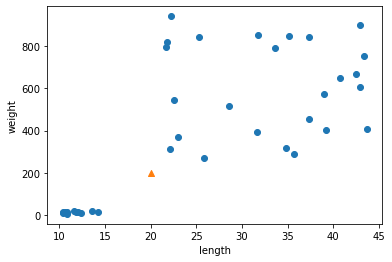

In [43]:
import matplotlib.pyplot as plt
plt.scatter(train[:,0], train[:,1])
plt.scatter(20, 200, marker='^')
# plt.scatter(test[:,0], test[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [44]:
distance, indexes = kn.kneighbors([[20,400]]) # 어느 집합에 속하는지 분류하기 위해 25와 150을 중심으로 최근접점 출력 

In [45]:
distance, indexes

(array([[14.26998668, 19.44059466, 24.5041926 , 28.641267  , 56.26113371]]),
 array([[26, 24, 10,  2, 30]], dtype=int64))

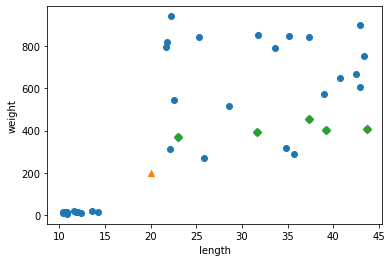

In [46]:
import matplotlib.pyplot as plt
plt.scatter(train[:,0], train[:,1])
plt.scatter(20, 200, marker='^')
plt.scatter(train[indexes,0], train[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

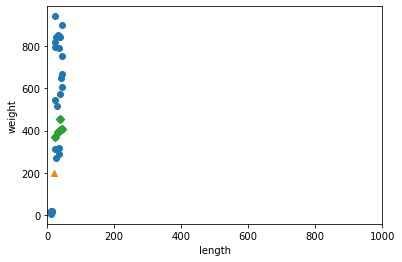

In [47]:
import matplotlib.pyplot as plt
plt.scatter(train[:,0], train[:,1])
plt.scatter(20, 200, marker='^')
plt.scatter(train[indexes,0], train[indexes,1], marker='D')
plt.xlim((0,1000)) # 데이터 스케일 통일시킴
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [48]:
# 스케일링
mean = np.mean(train, axis=0)
std = np.std(train, axis=0)

In [49]:
train, std

(array([[ 25.87214233, 269.14079338],
        [ 22.24026021, 939.75836858],
        [ 23.03363305, 371.5198447 ],
        [ 11.56535596,  18.86011827],
        [ 11.8722533 ,  17.22096084],
        [ 13.62818844,  18.32237493],
        [ 34.7787211 , 319.98624272],
        [ 28.61440621, 514.85965873],
        [ 35.17209075, 845.49871434],
        [ 40.78714922, 648.84400181],
        [ 43.69601025, 406.24135826],
        [ 42.98182653, 896.95948355],
        [ 21.65350107, 793.56698021],
        [ 12.37737777,  11.29186176],
        [ 43.32988607, 753.13765895],
        [ 22.5093562 , 542.10413508],
        [ 42.93141951, 603.41471137],
        [ 31.74223291, 849.41750939],
        [ 10.39150563,   9.88295749],
        [ 21.78802065, 819.51343266],
        [ 37.31162754, 843.61294398],
        [ 22.16728705, 315.28782559],
        [ 10.58267615,  17.62613165],
        [ 10.35232627,  15.23677242],
        [ 39.23968692, 402.7876815 ],
        [ 10.8388214 ,  15.57258979],
        [ 31

In [50]:
train_scaled = (train - mean) / std

In [51]:
train_scaled

array([[-0.05253411, -0.47786249],
       [-0.36038806,  1.57789829],
       [-0.29313837, -0.16402217],
       [-1.26523886, -1.24509141],
       [-1.23922492, -1.25011621],
       [-1.09038431, -1.24673985],
       [ 0.70242581, -0.32199709],
       [ 0.17991197,  0.27538232],
       [ 0.73576951,  1.28894777],
       [ 1.21172602,  0.68610785],
       [ 1.45829359, -0.05758427],
       [ 1.39775631,  1.44669942],
       [-0.41012429,  1.12975238],
       [-1.1964084 , -1.26829171],
       [ 1.42725933,  1.00581735],
       [-0.33757833,  0.35889955],
       [ 1.39348359,  0.54684553],
       [ 0.44504001,  1.30096073],
       [-1.36473946, -1.27261067],
       [-0.39872183,  1.20929056],
       [ 0.91712585,  1.28316699],
       [-0.36657358, -0.33639996],
       [-1.34853503, -1.24887417],
       [-1.36806047, -1.25619869],
       [ 1.08055646, -0.06817142],
       [-1.32682305, -1.25516925],
       [ 0.4414524 , -0.10176112],
       [ 1.05823729,  0.44817711],
       [ 0.77864176,

## 스케일 한 것을 가지고 모델을 다시 한 번 훈련하기
## - 전처리 데이터로 모델 훈련하기

In [52]:
# train : 학습용 데이터
# test : 검증용 데이터

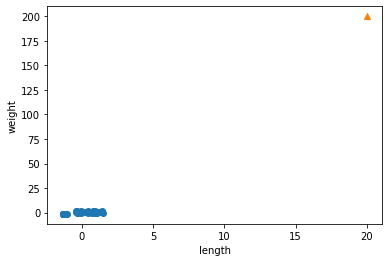

In [53]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(20, 200, marker ="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [55]:
new_target =([20,200] - mean) / std

TypeError: scatter() missing 1 required positional argument: 'y'

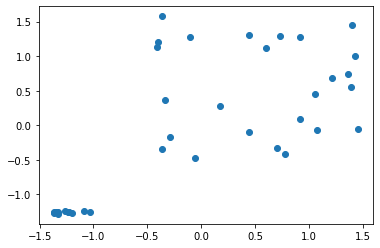

In [58]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new_target[0], marker ="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 훈련데이터를 표준화(정규화) - scaling 한 값을 학습에 적용시키기

In [59]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [60]:
### 검증 데이터도 표준화

In [61]:
test_scaled = (test - mean) / std

In [62]:
kn.score(test_scaled, test_target)

1.0

In [63]:
kn.predict([new_target])

array([1.])

In [64]:
distances, indexes = kn.kneighbors([new_target])

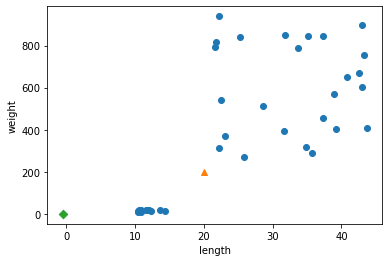

In [67]:
import matplotlib.pyplot as plt
plt.scatter(train[:,0], train[:,1])
plt.scatter(20, 200, marker='^')
plt.scatter(new_target[0], new_target[1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### 1. 훈련용 데이터와 평가용 데이터를 잘 섞은 후 나눔
####    사이킷런의 라이브러리를 이용해서 학습용과 테스트용으로 나눔
#### 2. 데이터의 스케일링 맞추기
####    사이킷런의 scaling 함수 이용
#### 3. 적합한 머신러닝을 선택
####    분류 문제 --> 기본적으로 kneighbors 이용